In [2]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [3]:
# 여기선 tensorflow 안쓴다. extracting features에 초점을 맞춘다.
#dataset path adn view passible targets
dataset_path = 'C:\\Users\\multicampus\\Desktop\\data_speech_commands_v0.02.tar\\data_speech_commands_v0.02'
# listdir => 현재 디렉토리에 있는 파일 리스트를 가져온다.
for name in listdir(dataset_path):
    # isdir => 디렉토리 경로가 존재하는지 체크
    # .join("/Users", "test") => 경로가 추가 된다. => /Users/test
    if isdir(join(dataset_path, name)):
        print(name)

backward
bed
bird
cat
dog
down
eight
five
follow
forward
four
go
happy
house
learn
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
visual
wow
yes
zero
_background_noise_


In [4]:
# Create on all targets List
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)
print(dataset_path)
print(listdir(dataset_path))
print(join(dataset_path, name))

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02
['.DS_Store', 'backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'LICENSE', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'README.md', 'right', 'seven', 'sheila', 'six', 'stop', 'testing_list.txt', 'three', 'tree', 'two', 'up', 'validation_list.txt', 'visual', 'wow', 'yes', 'zero', '_background_noise_']
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\_background_noise_


In [5]:
# Leave off background noise set
all_targets.remove('_background_noise_')
print(all_targets)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


In [6]:
# See how many files are in each
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

1664
2014
2064
2031
2128
3917
3787
4052
1579
1557
3728
3880
2054
2113
1575
3801
2100
3934
3941
3745
3845
3890
3778
3998
2022
3860
3872
3727
1759
3880
3723
1592
2123
4044
4052
Total samples: 105829


In [7]:
### Settings
# all_targets: list에 러닝할 폴더 이름들이 들어가 있다.
target_list = all_targets
# npz 파일에 저장할 이미지
feature_sets_file = 'all_targets_mfcc_sets.npz'
# 기능 추출 시 오래걸리니 양을 줄인다.



# 임의의 데이터 하위집합 10% , 나중에 전체 개수에서 나눌거다.
perc_keep_samples = 1 # 1.0은 모든 samples이다



# 제대로 작동하는지 확인하는 것
# 교차 유효성 검사에 대한 데이터 10%
val_ratio = 0.1
# 테스트 데이터 10%
test_ratio = 0.1
# wav 파일이 16KHz sampling으로 기록되는 동안인 1분에 더빨리 기록되게한다
# 8KHz와 같이 낮은 sampling 속도로 악취 횟수를 설정
sample_rate = 8000
# 중격계수는 16
num_mfcc = 16
# MFCC 길이는 16
len_mfcc = 16

In [8]:
# mfcc가 1분 동안 좋은 기능을 만들지 계속 생각해보자.
# Create List of filenames along with ground truth vector (y)
# 배열 만들기
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    # listdir => 현재 디렉토리에 있는 파일 리스트를 가져온다.
    filenames.append(listdir(join(dataset_path, target)))  # 단어당 안에 있는 음성파일을 []에 넣어서 추가 된다. 
    y.append(np.ones(len(filenames[index])) * index) # np.ones(len(filenames[index])) => [1]*음성파일 갯수.
    

C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\backward
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\bed
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\bird
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\cat
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\dog
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\down
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\eight
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\five
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\follow
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\forward
C:\Users\multicampus\Desktop\data_speech_commands_v0.02.tar\data_speech_c

In [9]:
# Check ground truth y vector
print(y)
for item in y:
    print(len(item))

[array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([2., 2., 2., ..., 2., 2., 2.]), array([3., 3., 3., ..., 3., 3., 3.]), array([4., 4., 4., ..., 4., 4., 4.]), array([5., 5., 5., ..., 5., 5., 5.]), array([6., 6., 6., ..., 6., 6., 6.]), array([7., 7., 7., ..., 7., 7., 7.]), array([8., 8., 8., ..., 8., 8., 8.]), array([9., 9., 9., ..., 9., 9., 9.]), array([10., 10., 10., ..., 10., 10., 10.]), array([11., 11., 11., ..., 11., 11., 11.]), array([12., 12., 12., ..., 12., 12., 12.]), array([13., 13., 13., ..., 13., 13., 13.]), array([14., 14., 14., ..., 14., 14., 14.]), array([15., 15., 15., ..., 15., 15., 15.]), array([16., 16., 16., ..., 16., 16., 16.]), array([17., 17., 17., ..., 17., 17., 17.]), array([18., 18., 18., ..., 18., 18., 18.]), array([19., 19., 19., ..., 19., 19., 19.]), array([20., 20., 20., ..., 20., 20., 20.]), array([21., 21., 21., ..., 21., 21., 21.]), array([22., 22., 22., ..., 22., 22., 22.]), array([23., 23., 23., ..., 23., 23., 23.]), arr

In [10]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [11]:
# Associate filenames with true output and shuffle
# >>> list(zip([1, 2, 3], [4, 5, 6]))   =>    [(1, 4), (2, 5), (3, 6)]
filenames_y = list(zip(filenames, y))
# shuffle은 리스트 항목 섞기
random.shuffle(filenames_y)
# 다시 unzip 한다 왜냐하면
filenames, y = zip(*filenames_y)

In [12]:
# Only keep the specified number of samples (shorter extraction/training)
# 우리는 프로토 타입 모델 중 총 10%만 사용할 것이다.
# 여기서 중요한 것은 다시 돌아와서 모든 데이터를 사용하는 것이다.
print(len(filenames))
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))

105829
105829


In [13]:
# Calculate validation and test set sizes
# 모델을 교육 할 준비가 끝났다.
# 두 개의 개별 검증 테스트에서 파일 이름 목록 및 근거정보 목록을 wav 파일에서 function을 추출 할 준비가 됐다
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [14]:
# Break dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [15]:
# Break y apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [16]:
# Function: Create MFCC from given path
def calc_mfcc(path):
    
    #Load wavdfile
    # 초당 8000개의 샘플로 리샘플링 하는 Librosa를 사용하여 주어진 경로에서
    # wav파일을 빠르게 로드하자
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    # MFCC 기능을 제공하는 python_speech_features를 사용하자
    # 기능들을 이용하여 해당 파형에서 MFCC 세트를 만들자 
    # 매개변수를 사용하여 MFCC set 수를 유지한다.
    # winlen은 25ms 에서 256ms 로 넓히자
    # winstep은 50ms 늘렸다
    # nFFT에 사용할 샘플 수는 window 크기에 따라 다르다.
    
    mfccs = python_speech_features.base.mfcc(signal,
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

In [17]:
# signal - 특징을 계산할 오디오 신호, N*1 배열이어야 한다
# simplerate - 우리가 작업하고 있는 신호의 샘플링 속도
# winlen - 분석 창의 길이의 기본값은 0.025초이다
# winstep - 몇 초 안에 연속적인 윈도우 사이의 step. 기본값은 0.01초
# numcep - 반환되는 cepstrum 수, 기본값이 13
# nfilt - filterbank안의 filter의 수. 디폴트는 26
# nfft - FFT 사이즈. 디폴트는 512
# lowfreq - mel filters의 가장 낮은 band edge. 기본 Hz는 0
# highfreq - mel filters의 가장 높 band edge. 기본 Hz는 samplerate/2
# preemph - apply preemphasis filter with preemph as coefficient. 0 is no filter. Default is 0.97
# ceplifter -apply a lifter to final cepstral coefficients. 0 is no lifter. Default is 22
# appendEnergy - if this is true, the zeroth cepstral coefficient is replaced with the log of the total frame energy.
# returns - A numpy array of size (NUMFRAMES by numcep) containing features. Each row holds 1 feature vector.

In [18]:
#위의 내용을 약간의 파일들에 테스트를 해보자 
# 처음에는 500개의 훈련 세트를 가져오자
# m 개의 FCC 매트릭스의 모양을 보자 각 오디오 파일을 16세트의 16세트를 생성해야한다.
# TEST: Construct test set by computing MFCC of each WAV file
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    # Stop after 500
    if index >= 500:
        break
        
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])],
               filename)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        prob_cnt += 1

Dropped: 3 (16, 12)
Dropped: 21 (16, 15)
Dropped: 33 (16, 13)
Dropped: 56 (16, 13)
Dropped: 63 (16, 11)
Dropped: 69 (16, 15)
Dropped: 91 (16, 15)
Dropped: 95 (16, 11)
Dropped: 96 (16, 8)
Dropped: 100 (16, 11)
Dropped: 101 (16, 13)
Dropped: 115 (16, 13)
Dropped: 134 (16, 13)
Dropped: 153 (16, 10)
Dropped: 165 (16, 11)
Dropped: 171 (16, 13)
Dropped: 180 (16, 8)
Dropped: 194 (16, 13)
Dropped: 197 (16, 6)
Dropped: 208 (16, 10)
Dropped: 218 (16, 9)
Dropped: 261 (16, 13)
Dropped: 267 (16, 5)
Dropped: 272 (16, 12)
Dropped: 300 (16, 4)
Dropped: 315 (16, 13)
Dropped: 317 (16, 13)
Dropped: 321 (16, 12)
Dropped: 376 (16, 7)
Dropped: 448 (16, 15)
Dropped: 451 (16, 13)
Dropped: 457 (16, 10)
Dropped: 458 (16, 15)
Dropped: 496 (16, 5)


In [19]:
# 오디오 파일 중 손상(?) 된 것들의 갯수에 500을 나누면 1초도 안걸린다? 
print('% of problematic samples:', prob_cnt / 500)


% of problematic samples: 0.068


MFCCs: [[-5.42517370e+01 -5.34845042e+01 -5.30167580e+01 -4.76347112e+01
  -3.30563455e+01 -2.17144299e+01 -1.71370585e+01 -1.65519251e+01
  -2.17639912e+01 -3.07394152e+01 -3.69535780e+01 -4.42623008e+01
  -5.03578020e+01 -5.57713068e+01 -5.76182060e+01 -5.80101134e+01]
 [ 3.57721794e+00  3.31342228e+00  4.80297664e+00  3.51345767e+00
   7.53533934e+00  1.07017412e+01  1.13372555e+01  1.10180747e+01
   1.06622674e+01  1.04938214e+01  1.06242197e+01  1.22014423e+01
   1.02742820e+01  9.14451618e+00  7.39796005e+00  7.39502410e+00]
 [ 2.06169606e+00  2.48659408e+00  3.03973638e+00  3.82446388e+00
  -2.40810563e+00 -5.38170872e+00 -5.57687876e+00 -2.46615843e+00
   3.81251497e+00  1.01736938e+01  9.42662646e+00  4.55204494e+00
   1.01650872e+00 -2.05100089e-01 -1.54943940e-01 -6.41865923e-02]
 [ 2.00906204e+00  2.22619070e+00  1.98788088e+00  2.88038004e+00
  -2.34130216e+00 -1.93705031e+00 -1.40692786e+00 -2.65440436e+00
  -4.21536997e+00 -4.16450057e+00 -1.42672539e+00  2.88229520e-01


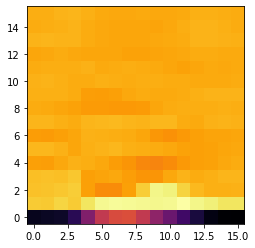

In [64]:
# 0.08이니 샘플의 손상간 부분은 약 10% 라는 결론이 나온다.
# 이중 몇개는 재생 사운드 라이브러리를 사용하여 단어를 여러개 테스트 하고 오디오 샘플의 MFCC와 결과 이미지를 보인다.
# 잘 들이거나 안들리는 것도 여러개 있다.
# TEST: Test shorter MFCC
# !pip install playsound
from playsound import playsound

idx = 46


# Create path from given filename and target item
path = join(dataset_path, target_list[int(y_orig_train[idx])],
           filenames_train[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: play problem sounds
print(target_list[int(y_orig_train[idx])])
playsound(path)
############ 밑에 그림이 16x16 행렬 변환한거.

In [23]:
# 파일이 점으로 끝나는지 확인하는 함수
# 웨이브는 길이가 충분하지 않은 경우 Y벡터의 샘플 및 해당 레이블을 MFCC로 계산한다.
# function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
    
    for index, filename in enumerate(in_files):
        
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])],
                   filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue
            
        # Create MFCCs
        mfccs = calc_mfcc(path)
        
        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [22]:
# 교육 검증에서 테스트 세트를 활용해 해당 기능을 실행한다
# Create train, valudation, and test sets
x_train, y_train, prob = extract_features(filenames_train,
                                          y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

Dropped: 3 (16, 12)
Dropped: 21 (16, 15)
Dropped: 33 (16, 13)
Dropped: 56 (16, 13)
Dropped: 63 (16, 11)
Dropped: 69 (16, 15)
Dropped: 91 (16, 15)
Dropped: 95 (16, 11)
Dropped: 96 (16, 8)
Dropped: 100 (16, 11)
Dropped: 101 (16, 13)
Dropped: 115 (16, 13)
Dropped: 134 (16, 13)
Dropped: 153 (16, 10)
Dropped: 165 (16, 11)
Dropped: 171 (16, 13)
Dropped: 180 (16, 8)
Dropped: 194 (16, 13)
Dropped: 197 (16, 6)
Dropped: 208 (16, 10)
Dropped: 218 (16, 9)
Dropped: 261 (16, 13)
Dropped: 267 (16, 5)
Dropped: 272 (16, 12)
Dropped: 300 (16, 4)
Dropped: 315 (16, 13)
Dropped: 317 (16, 13)
Dropped: 321 (16, 12)
Dropped: 376 (16, 7)
Dropped: 448 (16, 15)
Dropped: 451 (16, 13)
Dropped: 457 (16, 10)
Dropped: 458 (16, 15)
Dropped: 496 (16, 5)
Dropped: 533 (16, 7)
Dropped: 552 (16, 12)
Dropped: 600 (16, 11)
Dropped: 637 (16, 11)
Dropped: 660 (16, 11)
Dropped: 667 (16, 14)
Dropped: 692 (16, 11)
Dropped: 701 (16, 13)
Dropped: 726 (16, 14)
Dropped: 730 (16, 11)
Dropped: 754 (16, 12)
Dropped: 756 (16, 15)
Dropped

KeyboardInterrupt: 

In [ ]:
# 위의 결과는 simple중에 약 10프로 정도 제거 된 것을 알 수 있다.
# 마지막으로 numpy save Z 함수를 사용하여 이러한 대규모 배열을 NP에 저장한다.
np.savez(feature_sets_file,
        x_train=x_train,
        y_train=y_train,
        x_val=x_val,
        y_val=y_val,
        x_test=x_test,
        y_test=y_test)

In [ ]:
# TEST: Load features
# numpy dot load라고 부르고 우리가 할 수 있는 파일의 위치를 알려준다.
# 사용 가능한 배열을 나열하고 각 배열의 샘플 수 를 확인하자
feature_sets = np.load(feature_sets_file)
feature_sets.files

In [ ]:
len(feature_sets['x_train'])

In [ ]:
# y 유효성 섬사 세트를 인쇄 하여 우리가 가진 모든 레이블을 볼 수 있다.
print(feature_sets['y_val'])